In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # 그래프
from sklearn.metrics import accuracy_score, precision_score

# 1. 데이터 불러오기 및 확인

## 1-1 파일 불러오기

In [2]:
df = pd.read_csv("Preprocessed_ObesityDataSet1.csv")
df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad,BMI
0,0,21,1.62,64.0,0,0,2,3,2,0,...,0,1,3,0,0,0,1,0,1,24.386526
1,0,21,1.52,56.0,0,0,3,3,2,1,...,3,0,2,0,0,0,1,0,1,24.238227
2,1,23,1.80,77.0,0,0,2,3,2,0,...,2,1,1,0,0,0,1,0,1,23.765432


In [3]:
df.duplicated().sum()

47

## 1-2 데이터 확인하기

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   int64  
 7   NCP                             2111 non-null   int64  
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   int64  
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [5]:
df.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.315964,1.701669,86.585978,0.182378,0.883941,2.423496,2.687826,1.859308,0.020843,...,1.006632,0.664614,2.268593,0.216485,0.003316,0.005211,0.748460,0.026528,3.112269,29.700395
std,0.500083,6.357078,0.093311,26.191165,0.386247,0.320371,0.583905,0.809680,0.468543,0.142893,...,0.895462,0.674009,0.515498,0.411946,0.057502,0.072015,0.434001,0.160737,1.985062,8.011182
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.989340
25%,0.000000,20.000000,1.630000,65.450000,0.000000,1.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,24.325802
50%,1.000000,23.000000,1.700000,83.000000,0.000000,1.000000,2.000000,3.000000,2.000000,0.000000,...,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,28.719723
75%,1.000000,26.000000,1.768000,107.450000,0.000000,1.000000,3.000000,3.000000,2.000000,0.000000,...,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,36.007628
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,...,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,50.820275


In [59]:
df.corrwith(df["NObeyesdad"]).abs().sort_values()[::-1]

NObeyesdad                        1.000000
family_history_with_overweight    0.500697
CAEC                              0.341265
Age                               0.284422
FAVC                              0.242766
SCC                               0.194944
FAF                               0.178842
FCVC                              0.157467
Height                            0.152476
MTRANS_Walking                    0.136622
CALC                              0.136001
CH2O                              0.108989
TUE                               0.065581
MTRANS_Public_Transportation      0.064605
MTRANS_Motorbike                  0.036100
MTRANS_Bike                       0.035888
NCP                               0.012468
Gender                            0.011981
SMOKE                             0.009518
MTRANS_Automobile                 0.003184
dtype: float64

In [7]:
df.corrwith(df["NObeyesdad"], method="spearman") # Height는 제곱으로 들어가지만 Weight는 직접적으로 들어가서 영향을 많이 미침 

Gender                           -0.037011
Age                               0.409386
Height                            0.126913
Weight                            0.921325
family_history_with_overweight   -0.500264
FAVC                              0.249962
FCVC                              0.207816
NCP                              -0.018456
CAEC                              0.352752
SMOKE                             0.003250
CH2O                              0.137553
SCC                              -0.194482
FAF                              -0.190270
TUE                              -0.059823
CALC                             -0.168379
MTRANS_Automobile                -0.029200
MTRANS_Bike                      -0.036622
MTRANS_Motorbike                 -0.037927
MTRANS_Public_Transportation      0.090331
MTRANS_Walking                   -0.138972
NObeyesdad                        1.000000
BMI                               0.988006
dtype: float64

In [8]:
# 연관성이 너무 높은 Weight drop
df = df.drop(["Weight", "BMI"], axis=True)

# 2. 데이터 전처리

## 2-1. 이상치 확인하기

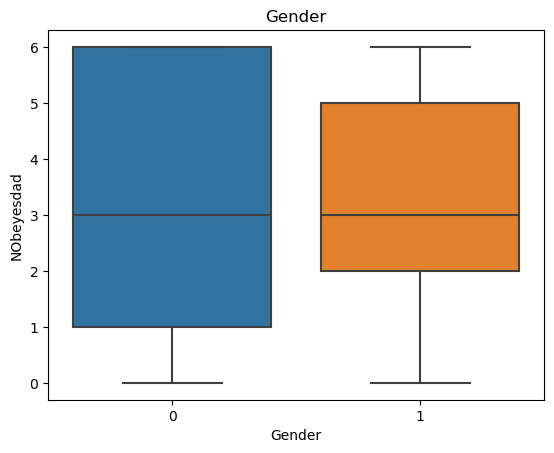

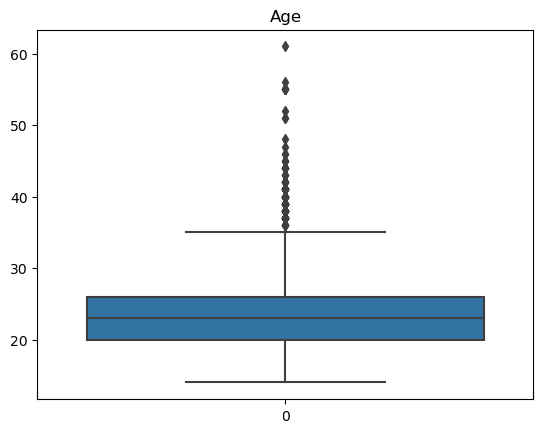

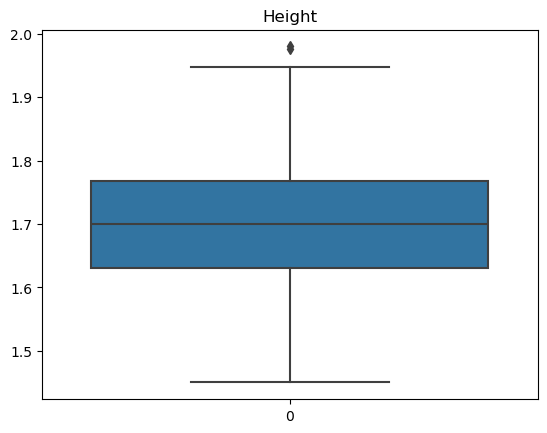

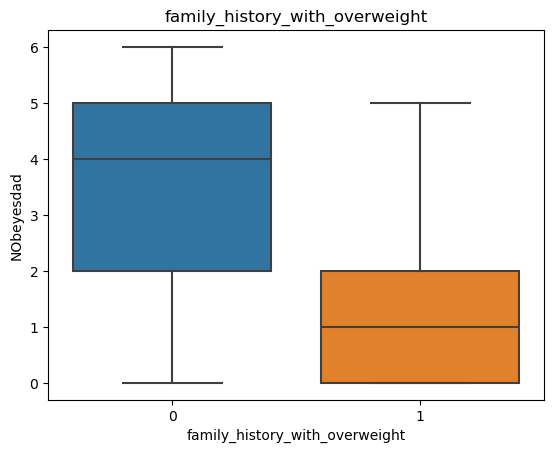

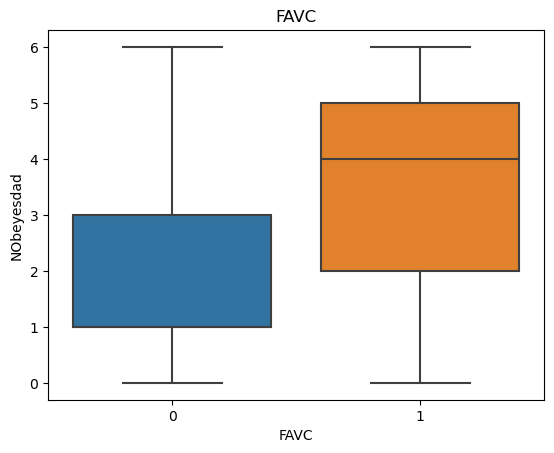

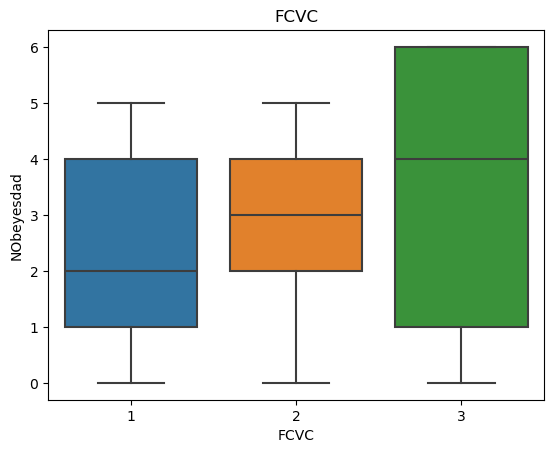

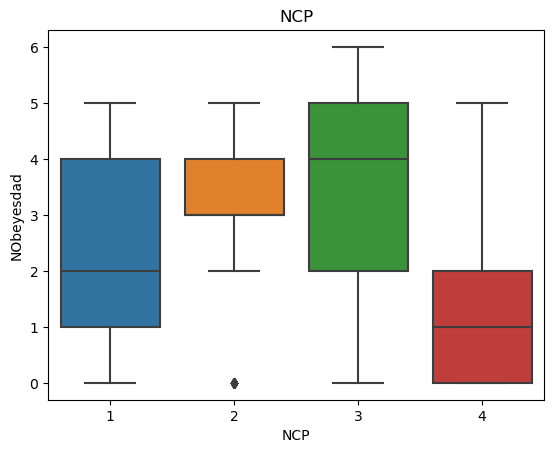

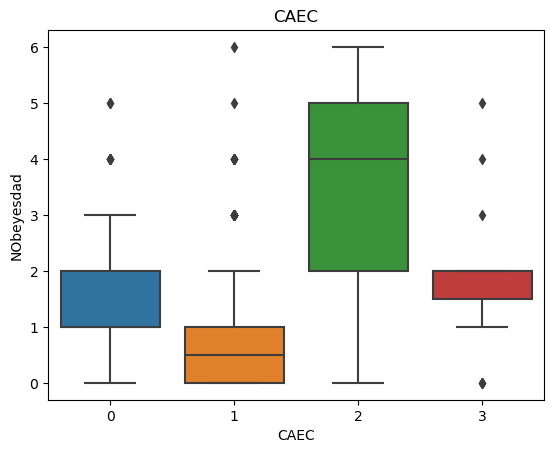

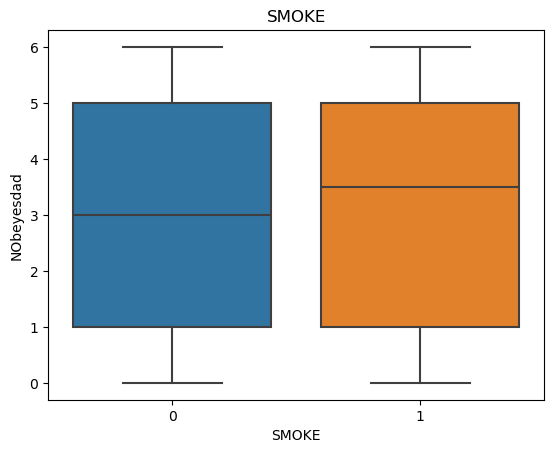

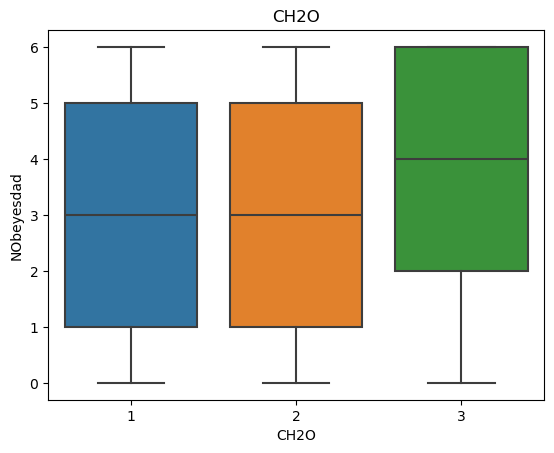

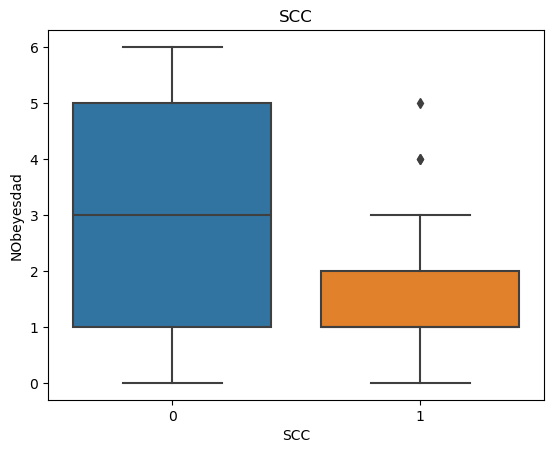

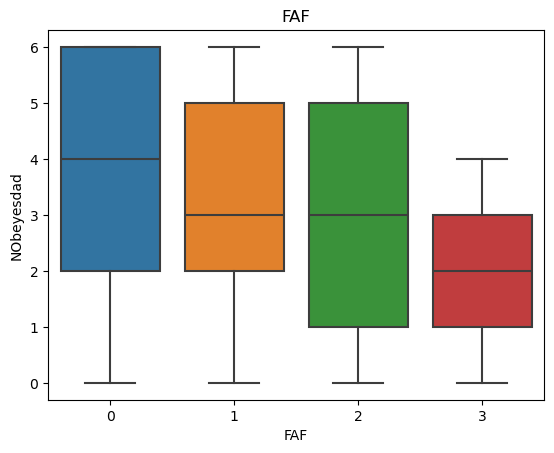

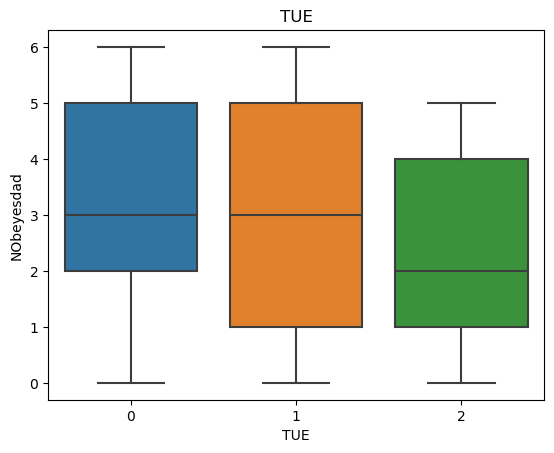

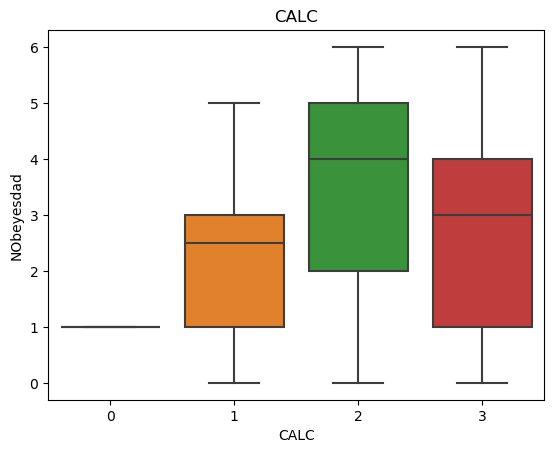

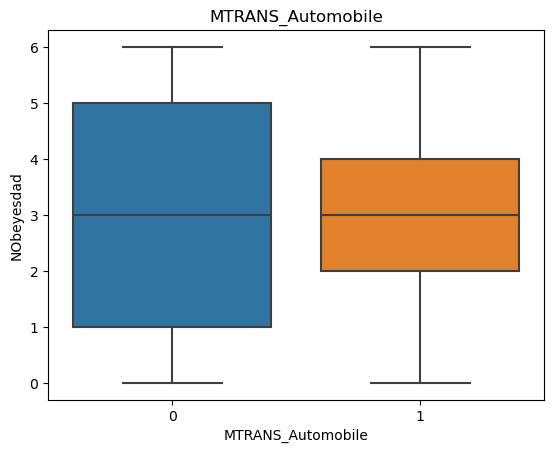

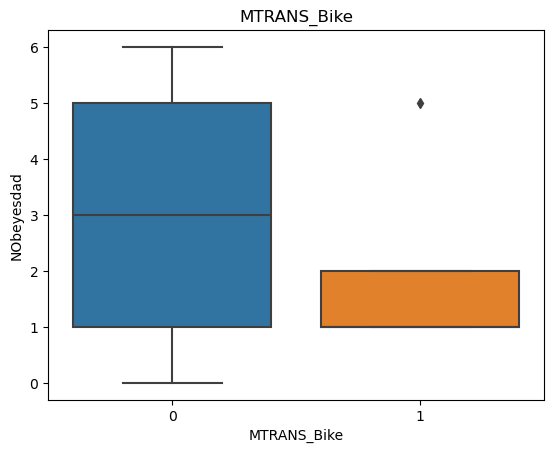

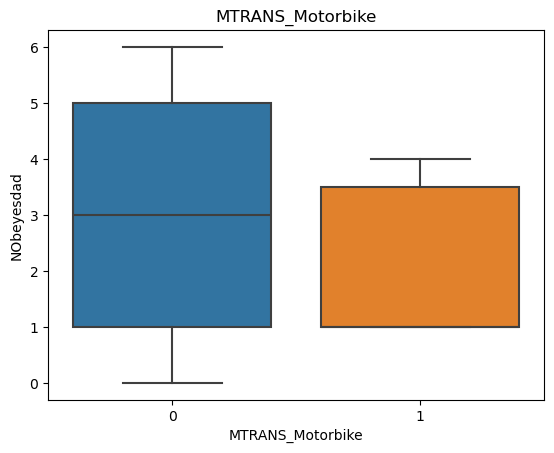

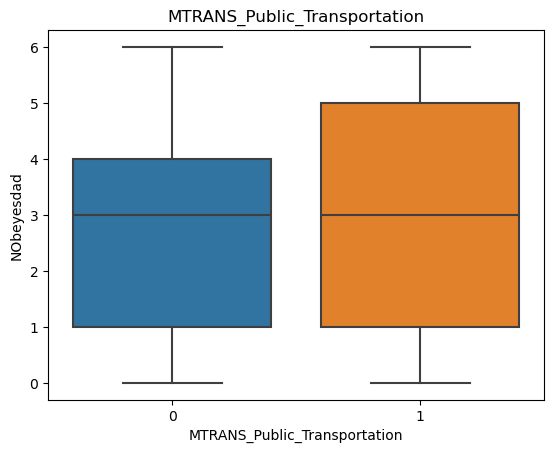

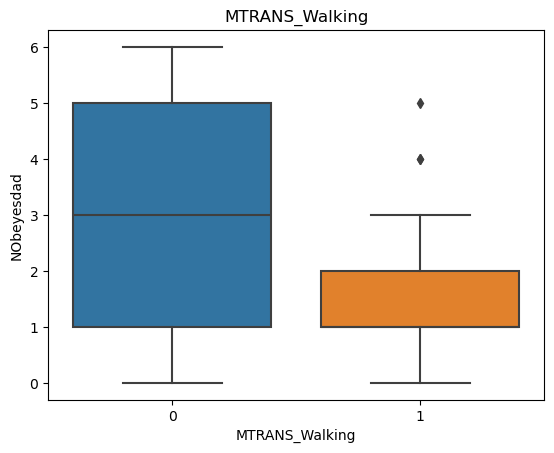

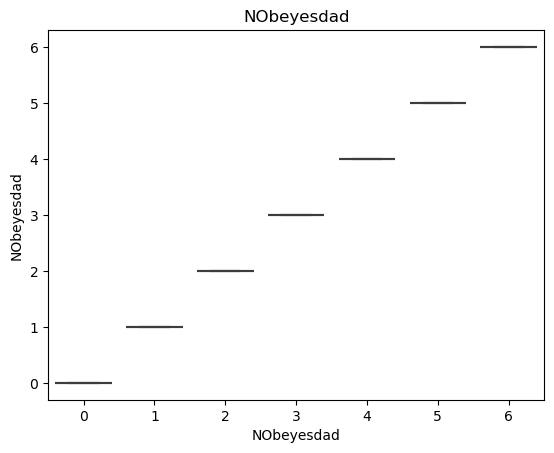

In [9]:
for col_name in df.columns:
    if df[col_name].dtype == "object" or len(df[col_name].unique())<10:
        sns.boxplot(x = col_name, y="NObeyesdad", data=df)
        plt.title(col_name)
        plt.show()
    else:
        sns.boxplot(df[col_name])
        plt.title(col_name)
        plt.show()

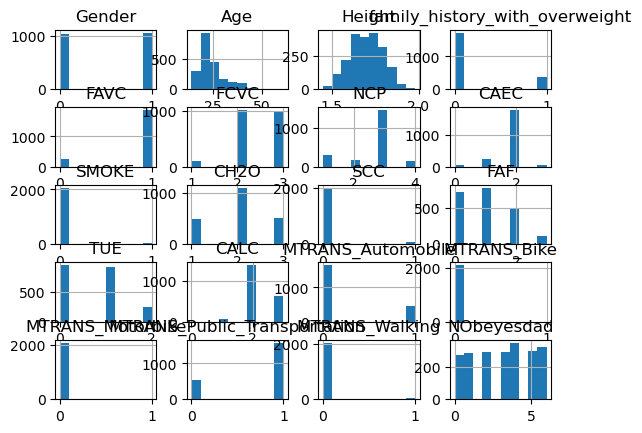

In [10]:
df.hist()
plt.show()

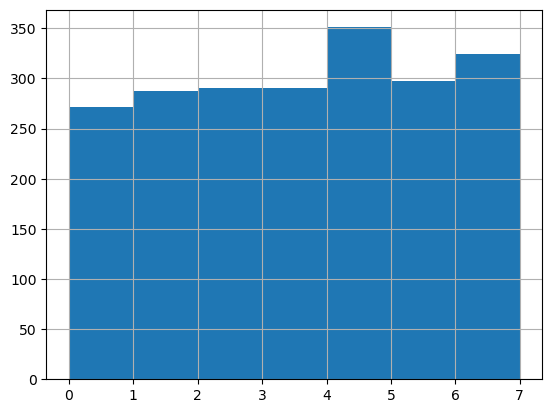

In [11]:
x = df["NObeyesdad"]
plt.hist(x, bins=range(8))
plt.grid()

## 2-2. 중복 데이터  확인하기 / 클래스 균형 확인

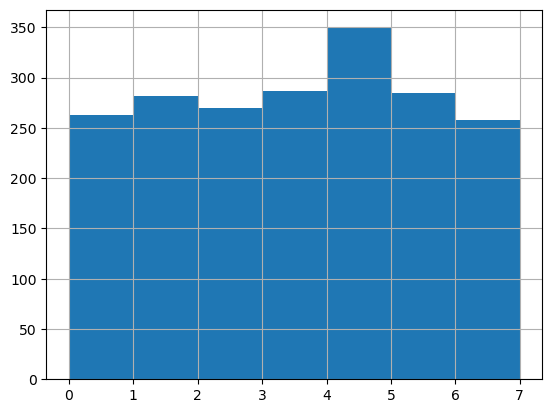

In [12]:
temp = df.drop_duplicates()
x = temp["NObeyesdad"]
plt.hist(x, bins=range(8))
plt.grid() # 삭제해도 target의 균등한 분포가 유지되니 삭제해도 될 듯

In [13]:
df = df.drop_duplicates()
df.head()

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,0,21,1.62,0,0,2,3,2,0,2,0,0,1,3,0,0,0,1,0,1
1,0,21,1.52,0,0,3,3,2,1,3,1,3,0,2,0,0,0,1,0,1
2,1,23,1.80,0,0,2,3,2,0,2,0,2,1,1,0,0,0,1,0,1
3,1,27,1.80,1,0,3,3,2,0,2,0,2,0,1,0,0,0,0,1,2
4,1,22,1.78,1,0,2,1,2,0,2,0,0,0,2,0,0,0,1,0,3


## 2-3 Scaling

In [14]:
# 스케일링 fit 전에 데이터 분리하기, 일단 K-fold 없이 
featureDF = df.iloc[:,:-1]
targetSR = df.iloc[:,-1]

from sklearn.model_selection import train_test_split # 분리
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2,
                                                                        stratify=targetSR,
                                                                         random_state = 42)

In [15]:
def plot_hist(DF, col_list):
    for col in col_list:
        DF[col].hist()
        plt.title(col)
        plt.show()

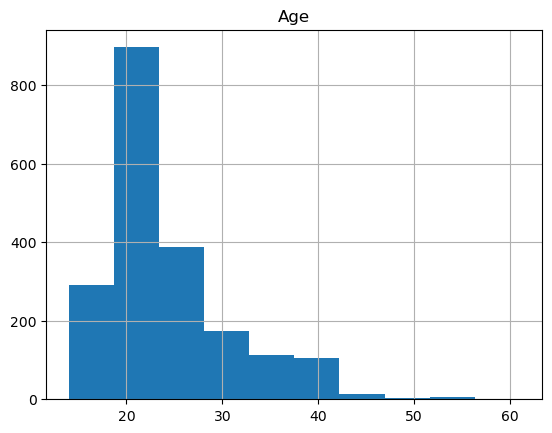

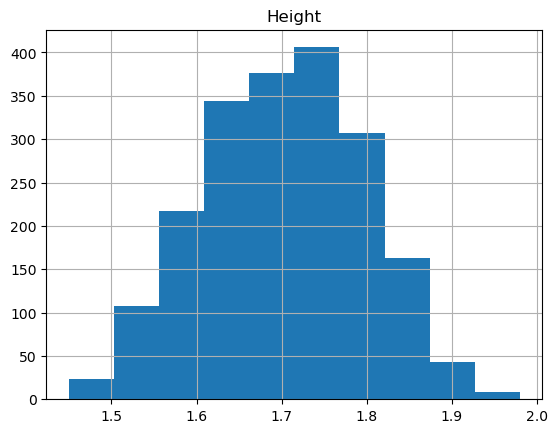

In [16]:
# 표준화전 
col_list = ["Age", "Height"]
plot_hist(featureDF, col_list)

In [17]:
from sklearn.preprocessing import StandardScaler # 평균 0 편차 1 표준화
Age_Stand = StandardScaler()
Height_Stand = StandardScaler()

Stand_X_train = X_train.copy()
Stand_X_test = X_test.copy()

Stand_X_train["Age"] = Age_Stand.fit_transform(X_train[["Age"]])
Stand_X_train["Height"] = Height_Stand.fit_transform(X_train[["Height"]])

Stand_X_test["Age"] = Age_Stand.transform(X_test[["Age"]])
Stand_X_test["Height"] = Height_Stand.transform(X_test[["Height"]])

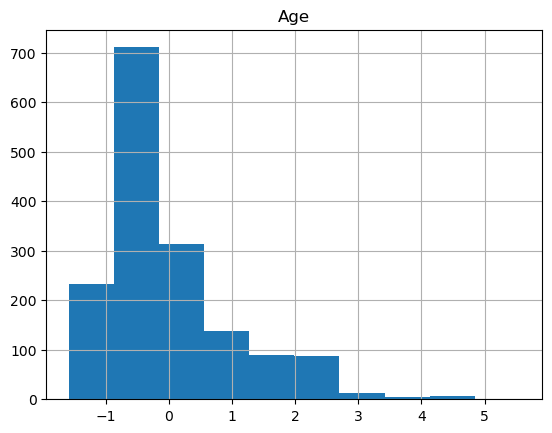

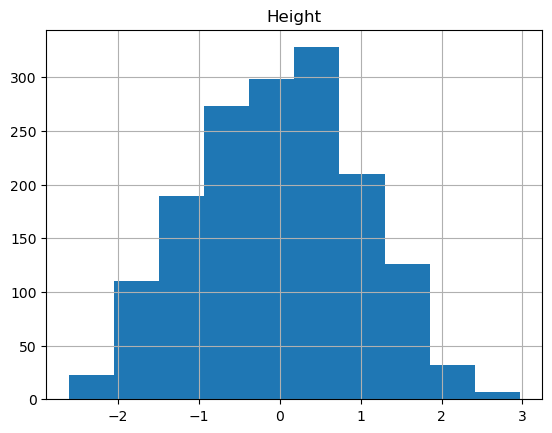

In [18]:
# 표준화 후
col_list = ["Age", "Height"]
plot_hist(Stand_X_train, col_list)

# 3. 분류 모델

In [19]:
# 단독 모델
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC # Support Vector Classification
from sklearn.tree import DecisionTreeClassifier # DecisionTree
from sklearn.ensemble import RandomForestClassifier # 왕많은 DecisionTree

In [20]:
def print_score(model, X_train, X_test, y_train, y_test):
    print(f"train score : {model.score(X_train, y_train)}, test score : {model.score(X_test, y_test)}")
    print("precision_score")
    test_pred = model.predict(X_test)
    pre_score = precision_score(y_test, test_pred, average="micro")
    print(pre_score)

In [21]:
Logistic_model = LogisticRegression(max_iter=1000, random_state=42)
SVC_model = SVC(random_state=42)
Tree_model = DecisionTreeClassifier(max_depth=6, random_state=42)
Random_Forest_model = RandomForestClassifier(max_depth=6, random_state=42)

model_list = [Logistic_model, SVC_model, Tree_model, Random_Forest_model]

for model in model_list:
    model.fit(Stand_X_train, y_train)
    print(model.score(Stand_X_train, y_train))
    print(model.score(Stand_X_test, y_test))
    print()

0.5839598997493735
0.5714285714285714

0.7261904761904762
0.7243107769423559

0.656641604010025
0.606516290726817

0.7725563909774437
0.7493734335839599



In [22]:
# 랜덤 포레스트만 가지고 해보자!! 

## (SGD)확률적 경사 하강법 써보기 -> 로지스틱과 비교

In [65]:
from sklearn.linear_model import SGDClassifier # 확률적 경사하강법

SGD_model = SGDClassifier(loss="log_loss", random_state=42, max_iter = 10000)
# 한 번에 한 개 데이터만 랜덤 샘플링 통해 추출 후 Gradient 계산

SGD_model.fit(Stand_X_train, y_train)

SGDClassifier(loss='log_loss', max_iter=10000, random_state=42)

In [67]:
print_score(SGD_model, Stand_X_train, Stand_X_test, y_train, y_test)

train score : 0.5037593984962406, test score : 0.48621553884711777
precision_score
0.48621553884711777


---

In [25]:
from sklearn.model_selection import cross_val_score, cross_validate
# cross_validate은 기본적으로 stratified K-fl
test_model = DecisionTreeClassifier()

cross_validate(test_model, featureDF, targetSR, scoring="accuracy", cv=5)["test_score"]

array([0.56390977, 0.72180451, 0.77694236, 0.75438596, 0.81203008])

---

## 랜덤 포레스트만 해보기
n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,

In [26]:
from sklearn.model_selection import GridSearchCV

n_CV = 5

Random_Forest_model = RandomForestClassifier(max_depth=6)

params = { "n_estimators" : [100, 150],
          "criterion" : ["gini", "entropy", "log_loss"],
          "max_depth" : [4, 5, 6],
}

GS = GridSearchCV(Random_Forest_model, param_grid=params, cv = n_CV)

result = GS.fit(Stand_X_train, y_train)

In [27]:
cv_resultDF = pd.DataFrame(GS.cv_results_)
cv_resultDF.sort_values("rank_test_score", ascending=True).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.345832,0.027204,0.018849,0.006453,entropy,6,150,"{'criterion': 'entropy', 'max_depth': 6, 'n_es...",0.693750,0.667712,0.730408,0.742947,0.705329,0.708029,0.026671,1
17,0.340003,0.051356,0.025401,0.007805,log_loss,6,150,"{'criterion': 'log_loss', 'max_depth': 6, 'n_e...",0.690625,0.686520,0.717868,0.724138,0.711599,0.706150,0.014946,2
10,0.230195,0.040138,0.012713,0.011760,entropy,6,100,"{'criterion': 'entropy', 'max_depth': 6, 'n_es...",0.684375,0.680251,0.730408,0.730408,0.702194,0.705527,0.021612,3
16,0.229359,0.036043,0.012520,0.006260,log_loss,6,100,"{'criterion': 'log_loss', 'max_depth': 6, 'n_e...",0.696875,0.686520,0.714734,0.736677,0.683386,0.703638,0.019817,4
5,0.279535,0.038179,0.022267,0.007669,gini,6,150,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.681250,0.686520,0.717868,0.727273,0.702194,0.703021,0.017638,5
4,0.219932,0.013506,0.014601,0.002047,gini,6,100,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.687500,0.667712,0.695925,0.721003,0.692790,0.692986,0.017103,6
15,0.334824,0.036688,0.031147,0.000262,log_loss,5,150,"{'criterion': 'log_loss', 'max_depth': 5, 'n_e...",0.646875,0.611285,0.673981,0.705329,0.655172,0.658529,0.031010,7
8,0.200989,0.021391,0.015623,0.013974,entropy,5,100,"{'criterion': 'entropy', 'max_depth': 5, 'n_es...",0.631250,0.611285,0.673981,0.695925,0.652038,0.652896,0.029989,8
2,0.193992,0.029393,0.009632,0.012592,gini,5,100,"{'criterion': 'gini', 'max_depth': 5, 'n_estim...",0.625000,0.620690,0.680251,0.683386,0.642633,0.650392,0.026711,9
9,0.315088,0.042382,0.015757,0.000272,entropy,5,150,"{'criterion': 'entropy', 'max_depth': 5, 'n_es...",0.637500,0.611285,0.673981,0.683386,0.645768,0.650384,0.025930,10


In [28]:
best_model = GS.best_estimator_

In [29]:
best_model.score(Stand_X_train, y_train)

0.7769423558897243

In [30]:
best_model.score(Stand_X_test, y_test)

0.7518796992481203

---

In [31]:
from sklearn.ensemble import BaggingClassifier # 배깅 분류기 병렬 같은 알고리즘을 여러번 사용

ensemble_bagging_model = BaggingClassifier(estimator=best_model, n_estimators=100, random_state=42)
ensemble_bagging_model.fit(Stand_X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                   max_depth=6,
                                                   n_estimators=150),
                  n_estimators=100, random_state=42)

In [32]:
print_score(ensemble_bagging_model, Stand_X_train, Stand_X_test, y_train, y_test)

train score : 0.793233082706767, test score : 0.7644110275689223
precision_score
0.7644110275689223


----

부스팅 방식(직렬) : 앞의 학습 결과를 가지고 순차적으로 학습하며 오차를 줄여 나감
- AdaBoost : 이전 예측기를 보완하는 새로운 예측기, 가중치 업데이트 -> pick
- Gradient Boost : 이전 모델 결과의 잔여 오차 사용
- XGboost : Gradient에서 정확도와 속도를 개선한 모델 -> pick

In [33]:
from sklearn.ensemble import AdaBoostClassifier # 부스팅은 랜덤포레스트 기반

In [34]:
Ada_model = AdaBoostClassifier(
    best_model, random_state=42)
Ada_model.fit(Stand_X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=6,
                                                    n_estimators=150),
                   random_state=42)

In [35]:
print_score(Ada_model, Stand_X_train, Stand_X_test, y_train, y_test)

train score : 0.9786967418546366, test score : 0.8345864661654135
precision_score
0.8345864661654135


In [36]:
n_CV = 5

'''
 n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None,
    base_estimator='deprecated',
'''
params = { "n_estimators" : [50],
          "algorithm" : ['SAMME', 'SAMME.R'],
          "learning_rate" : [0.5, 1.0],
}

GS2 = GridSearchCV(Ada_model, param_grid=params, cv = n_CV)

result2 = GS2.fit(Stand_X_train, y_train)

In [37]:
cv_resultDF2 = pd.DataFrame(GS2.cv_results_)
cv_resultDF2.sort_values("rank_test_score", ascending=True).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,19.047471,0.559787,0.917325,0.193254,SAMME.R,0.5,50,"{'algorithm': 'SAMME.R', 'learning_rate': 0.5,...",0.837500,0.808777,0.843260,0.818182,0.774295,0.816403,0.024498,1
0,19.850067,0.540263,1.009071,0.069532,SAMME,0.5,50,"{'algorithm': 'SAMME', 'learning_rate': 0.5, '...",0.809375,0.808777,0.821317,0.852665,0.749216,0.808270,0.033556,2
3,13.223756,0.563848,0.654282,0.041291,SAMME.R,1.0,50,"{'algorithm': 'SAMME.R', 'learning_rate': 1.0,...",0.837500,0.799373,0.830721,0.805643,0.768025,0.808252,0.024755,3
1,19.656565,0.468047,0.960843,0.052317,SAMME,1.0,50,"{'algorithm': 'SAMME', 'learning_rate': 1.0, '...",0.771875,0.727273,0.755486,0.786834,0.586207,0.725535,0.072412,4


In [38]:
best_model2 = GS2.best_estimator_

In [39]:
print_score(best_model2, Stand_X_train, Stand_X_test, y_train, y_test)

train score : 0.9730576441102757, test score : 0.8345864661654135
precision_score
0.8345864661654135


---

In [40]:
from sklearn.ensemble import GradientBoostingClassifier # 부스팅은 랜덤포레스트 기반

In [41]:
GBoost_model = GradientBoostingClassifier(random_state=42)
GBoost_model.fit(Stand_X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [42]:
print_score(GBoost_model, Stand_X_train, Stand_X_test, y_train, y_test)

train score : 0.9116541353383458, test score : 0.8020050125313283
precision_score
0.8020050125313283


---

In [43]:
from xgboost import XGBClassifier # XGboost

In [44]:
# 객체 생성
xgb_model = XGBClassifier(n_estimators=100, tree_method="hist", max_depth=5)
xgb_model.fit(Stand_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [45]:
print_score(xgb_model, Stand_X_train, Stand_X_test, y_train, y_test)

train score : 0.9993734335839599, test score : 0.8421052631578947
precision_score
0.8421052631578947


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

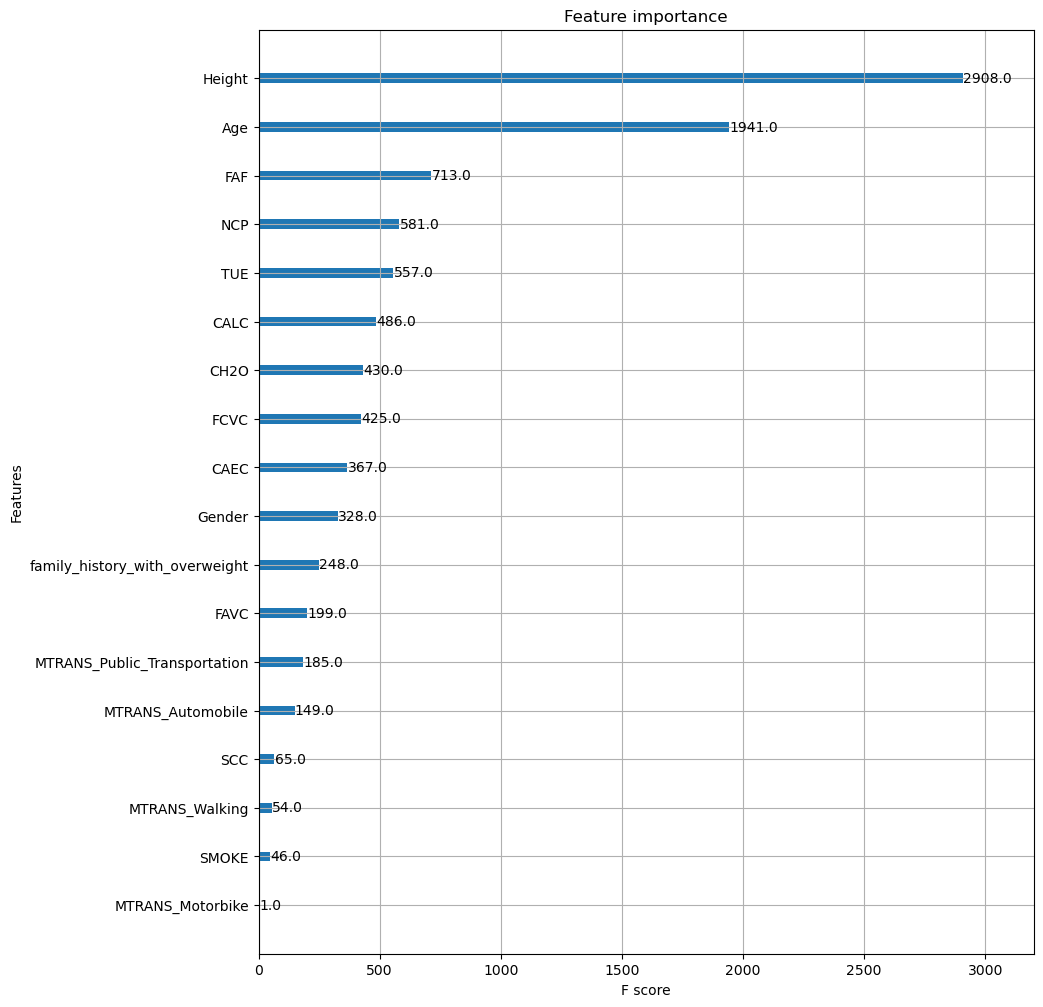

In [46]:

# 예측하기
# y_pre = xgb_model.predict(X_test)
# y_pred_probs = xgb_model.predict_proba(X_test)[:,1]

# 특성 중요도 시각화
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax) 


# 4. 평가

In [47]:
print_score(xgb_model, Stand_X_train, Stand_X_test, y_train, y_test)

train score : 0.9993734335839599, test score : 0.8421052631578947
precision_score
0.8421052631578947


In [48]:
my_data = pd.DataFrame([[0, -0.37025452, -1.18250493, 1, 1,     1, 2, 2, 0, 2,   0, 2, 0, 3, 0,   0, 0, 0, 1]], columns=Stand_X_train.columns)
xgb_model.predict(my_data)

array([1], dtype=int64)

In [49]:
import joblib
import os

# 모델 저장 
model_dir = "../model/"
model_filename = model_dir+"obesity.pkl"

# 저장 폴더 존재여부 확인 후 저장 
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

joblib.dump(xgb_model, model_filename)

['../model/obesity.pkl']

---

In [50]:
from flaml import AutoML

In [51]:
AutoML_model = AutoML()

AutoML_model_settings = {
    "time_budget": 1800,  
#     "estimator_list": ['lgbm', 'xgboost'],
#     "metric": 'accuracy',
    "metric": 'macro_f1',
#     "metric": 'log_loss',
    "task": 'classification',
    "n_jobs": -1,
    "eval_method": 'cv',
    "n_splits":5,
}

AutoML_model.fit(Stand_X_train, y_train, **AutoML_model_settings)

[flaml.automl.logger: 03-11 10:28:18] {1679} INFO - task = classification
[flaml.automl.logger: 03-11 10:28:18] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 03-11 10:28:18] {1788} INFO - Minimizing error metric: 1-macro_f1
[flaml.automl.logger: 03-11 10:28:18] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 03-11 10:28:18] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 03-11 10:28:18] {2344} INFO - Estimated sufficient time budget=668s. Estimated necessary time budget=15s.
[flaml.automl.logger: 03-11 10:28:18] {2391} INFO -  at 0.1s,	estimator lgbm's best error=0.4660,	best estimator lgbm's best error=0.4660
[flaml.automl.logger: 03-11 10:28:18] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 03-11 10:28:18] {2391} INFO -  at 0.2s,	estimator lgbm's best error=0.4660,	best estimator lgbm's best error=0.4660
[flaml.automl.logger: 03-11 10:28:1

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 03-11 10:29:07] {2391} INFO -  at 48.9s,	estimator lrl1's best error=0.4541,	best estimator lgbm's best error=0.1694
[flaml.automl.logger: 03-11 10:29:07] {2218} INFO - iteration 102, current learner lrl1


C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 03-11 10:29:07] {2391} INFO -  at 49.6s,	estimator lrl1's best error=0.4541,	best estimator lgbm's best error=0.1694
[flaml.automl.logger: 03-11 10:29:07] {2218} INFO - iteration 103, current learner lrl1


C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\s

[flaml.automl.logger: 03-11 10:29:08] {2391} INFO -  at 50.4s,	estimator lrl1's best error=0.4509,	best estimator lgbm's best error=0.1694
[flaml.automl.logger: 03-11 10:29:08] {2218} INFO - iteration 104, current learner lgbm


C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 03-11 10:29:09] {2391} INFO -  at 51.5s,	estimator lgbm's best error=0.1694,	best estimator lgbm's best error=0.1694
[flaml.automl.logger: 03-11 10:29:09] {2218} INFO - iteration 105, current learner xgboost
[flaml.automl.logger: 03-11 10:29:11] {2391} INFO -  at 53.6s,	estimator xgboost's best error=0.1865,	best estimator lgbm's best error=0.1694
[flaml.automl.logger: 03-11 10:29:11] {2218} INFO - iteration 106, current learner rf
[flaml.automl.logger: 03-11 10:29:12] {2391} INFO -  at 53.9s,	estimator rf's best error=0.2384,	best estimator lgbm's best error=0.1694
[flaml.automl.logger: 03-11 10:29:12] {2218} INFO - iteration 107, current learner rf
[flaml.automl.logger: 03-11 10:29:12] {2391} INFO -  at 54.2s,	estimator rf's best error=0.2384,	best estimator lgbm's best error=0.1694
[flaml.automl.logger: 03-11 10:29:12] {2218} INFO - iteration 108, current learner xgb_limitdepth
[flaml.automl.logger: 03-11 10:29:12] {2391} INFO -  at 54.4s,	estimator xgb_limitde

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 03-11 10:29:19] {2391} INFO -  at 61.0s,	estimator lrl1's best error=0.4509,	best estimator lgbm's best error=0.1694
[flaml.automl.logger: 03-11 10:29:19] {2218} INFO - iteration 116, current learner lgbm


C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 03-11 10:29:22] {2391} INFO -  at 63.7s,	estimator lgbm's best error=0.1694,	best estimator lgbm's best error=0.1694
[flaml.automl.logger: 03-11 10:29:22] {2218} INFO - iteration 117, current learner lgbm
[flaml.automl.logger: 03-11 10:29:24] {2391} INFO -  at 65.9s,	estimator lgbm's best error=0.1694,	best estimator lgbm's best error=0.1694
[flaml.automl.logger: 03-11 10:29:24] {2218} INFO - iteration 118, current learner xgb_limitdepth
[flaml.automl.logger: 03-11 10:29:24] {2391} INFO -  at 66.2s,	estimator xgb_limitdepth's best error=0.2179,	best estimator lgbm's best error=0.1694
[flaml.automl.logger: 03-11 10:29:24] {2218} INFO - iteration 119, current learner extra_tree
[flaml.automl.logger: 03-11 10:29:24] {2391} INFO -  at 66.4s,	estimator extra_tree's best error=0.2310,	best estimator lgbm's best error=0.1694
[flaml.automl.logger: 03-11 10:29:24] {2218} INFO - iteration 120, current learner lgbm
[flaml.automl.logger: 03-11 10:29:32] {2391} INFO -  at 74.4

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 03-11 10:31:19] {2391} INFO -  at 180.8s,	estimator lrl1's best error=0.4497,	best estimator lgbm's best error=0.1685
[flaml.automl.logger: 03-11 10:31:19] {2218} INFO - iteration 165, current learner xgb_limitdepth


C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 03-11 10:31:20] {2391} INFO -  at 182.3s,	estimator xgb_limitdepth's best error=0.1799,	best estimator lgbm's best error=0.1685
[flaml.automl.logger: 03-11 10:31:20] {2218} INFO - iteration 166, current learner lgbm
[flaml.automl.logger: 03-11 10:31:31] {2391} INFO -  at 193.6s,	estimator lgbm's best error=0.1685,	best estimator lgbm's best error=0.1685
[flaml.automl.logger: 03-11 10:31:31] {2218} INFO - iteration 167, current learner rf
[flaml.automl.logger: 03-11 10:31:32] {2391} INFO -  at 194.0s,	estimator rf's best error=0.1976,	best estimator lgbm's best error=0.1685
[flaml.automl.logger: 03-11 10:31:32] {2218} INFO - iteration 168, current learner rf
[flaml.automl.logger: 03-11 10:31:32] {2391} INFO -  at 194.4s,	estimator rf's best error=0.1976,	best estimator lgbm's best error=0.1685
[flaml.automl.logger: 03-11 10:31:32] {2218} INFO - iteration 169, current learner extra_tree
[flaml.automl.logger: 03-11 10:31:32] {2391} INFO -  at 194.5s,	estimator extra_

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 03-11 10:31:55] {2391} INFO -  at 217.4s,	estimator lrl1's best error=0.4479,	best estimator lgbm's best error=0.1685
[flaml.automl.logger: 03-11 10:31:55] {2218} INFO - iteration 178, current learner xgboost


C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 03-11 10:31:56] {2391} INFO -  at 218.6s,	estimator xgboost's best error=0.1817,	best estimator lgbm's best error=0.1685
[flaml.automl.logger: 03-11 10:31:56] {2218} INFO - iteration 179, current learner lgbm
[flaml.automl.logger: 03-11 10:31:58] {2391} INFO -  at 220.4s,	estimator lgbm's best error=0.1685,	best estimator lgbm's best error=0.1685
[flaml.automl.logger: 03-11 10:31:58] {2218} INFO - iteration 180, current learner xgboost
[flaml.automl.logger: 03-11 10:32:07] {2391} INFO -  at 228.8s,	estimator xgboost's best error=0.1778,	best estimator lgbm's best error=0.1685
[flaml.automl.logger: 03-11 10:32:07] {2218} INFO - iteration 181, current learner xgb_limitdepth
[flaml.automl.logger: 03-11 10:32:07] {2391} INFO -  at 229.6s,	estimator xgb_limitdepth's best error=0.1799,	best estimator lgbm's best error=0.1685
[flaml.automl.logger: 03-11 10:32:07] {2218} INFO - iteration 182, current learner xgboost
[flaml.automl.logger: 03-11 10:32:15] {2391} INFO -  at 

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 03-11 10:34:39] {2391} INFO -  at 381.2s,	estimator lrl1's best error=0.4479,	best estimator xgb_limitdepth's best error=0.1680
[flaml.automl.logger: 03-11 10:34:39] {2218} INFO - iteration 206, current learner xgb_limitdepth


C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 03-11 10:34:43] {2391} INFO -  at 385.7s,	estimator xgb_limitdepth's best error=0.1680,	best estimator xgb_limitdepth's best error=0.1680
[flaml.automl.logger: 03-11 10:34:43] {2218} INFO - iteration 207, current learner xgb_limitdepth
[flaml.automl.logger: 03-11 10:34:46] {2391} INFO -  at 388.5s,	estimator xgb_limitdepth's best error=0.1680,	best estimator xgb_limitdepth's best error=0.1680
[flaml.automl.logger: 03-11 10:34:46] {2218} INFO - iteration 208, current learner xgb_limitdepth
[flaml.automl.logger: 03-11 10:34:48] {2391} INFO -  at 390.6s,	estimator xgb_limitdepth's best error=0.1680,	best estimator xgb_limitdepth's best error=0.1680
[flaml.automl.logger: 03-11 10:34:48] {2218} INFO - iteration 209, current learner xgb_limitdepth
[flaml.automl.logger: 03-11 10:34:56] {2391} INFO -  at 398.1s,	estimator xgb_limitdepth's best error=0.1680,	best estimator xgb_limitdepth's best error=0.1680
[flaml.automl.logger: 03-11 10:34:56] {2218} INFO - iteration 210,

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 03-11 10:35:19] {2391} INFO -  at 421.6s,	estimator lrl1's best error=0.4479,	best estimator xgb_limitdepth's best error=0.1680
[flaml.automl.logger: 03-11 10:35:19] {2218} INFO - iteration 218, current learner rf


C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 03-11 10:35:20] {2391} INFO -  at 422.4s,	estimator rf's best error=0.1974,	best estimator xgb_limitdepth's best error=0.1680
[flaml.automl.logger: 03-11 10:35:20] {2218} INFO - iteration 219, current learner lgbm
[flaml.automl.logger: 03-11 10:35:24] {2391} INFO -  at 426.6s,	estimator lgbm's best error=0.1685,	best estimator xgb_limitdepth's best error=0.1680
[flaml.automl.logger: 03-11 10:35:24] {2218} INFO - iteration 220, current learner lgbm
[flaml.automl.logger: 03-11 10:35:31] {2391} INFO -  at 433.2s,	estimator lgbm's best error=0.1685,	best estimator xgb_limitdepth's best error=0.1680
[flaml.automl.logger: 03-11 10:35:31] {2218} INFO - iteration 221, current learner xgb_limitdepth
[flaml.automl.logger: 03-11 10:35:37] {2391} INFO -  at 439.0s,	estimator xgb_limitdepth's best error=0.1680,	best estimator xgb_limitdepth's best error=0.1680
[flaml.automl.logger: 03-11 10:35:37] {2218} INFO - iteration 222, current learner lgbm
[flaml.automl.logger: 03-11 10

In [52]:
print_score(AutoML_model, Stand_X_train, Stand_X_test, y_train, y_test)

train score : 1.0, test score : 0.8721804511278195
precision_score
0.8721804511278195
